In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#fivethirtyeight

#sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
df_eventos = pd.read_csv('/home/alejandro/Desktop/Orga_Datos_2C_2k18/tp1/fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)

In [3]:
df_eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [5]:
df_eventos['event'].value_counts()  # cantidad de tipos de eventos y sus apariciones en el set de datos

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [6]:
df_eventos['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [7]:
df_eventos['new_vs_returning'].isnull().value_counts()

True     923910
False     87378
Name: new_vs_returning, dtype: int64

In [8]:
# 1 - Se puede realizar el analisis de algunos usuarios para ver el avance de visitas en el tiempo.. ver como progreso la compra si se realizo o no.. 
# 2 - Analizar como es que llegan los usuarios a ala pagina.. cuales son los medios mas comunes, ya sea un buscador web o si aviso marketing, etc ...
# 3 - Ver que serie de eventos hace que lleguen los usuarios a comprar un producto..
# 4 - Contar la cantidad de apariciones de un usuario y la canidad de eventos que hizo..
# 5 - Ver en los dias de semana cuantos usuarios nuevos hay vs los que ya no lo son / tambien en horas en algunos dias...

In [9]:
# Ver dias de semana cuantos nuevos ingresantes hay

In [10]:
df_eventos['fecha_evento'] = pd.to_datetime(df_eventos['timestamp'])

In [11]:
df_eventos['fecha_evento_dia_name'] = df_eventos['fecha_evento'].dt.weekday_name

In [12]:
df_eventos['fecha_evento_dia_nameNum'] = df_eventos['fecha_evento'].dt.weekday

In [13]:
df_eventos['hora'] = df_eventos['fecha_evento'].dt.hour

In [14]:
df_eventos_usNuevos = (df_eventos.loc[df_eventos['new_vs_returning'] == "New"])

In [15]:
df_dia_en_usNuevo = (df_eventos_usNuevos.groupby(['fecha_evento_dia_name','fecha_evento_dia_nameNum']).size().reset_index(name='usNuevo'))

In [16]:
df_dia_en_usNuevo = df_dia_en_usNuevo.set_index('fecha_evento_dia_name')

In [17]:
df_dia_en_usNuevo.sort_values(by='fecha_evento_dia_nameNum', inplace=True)
del df_dia_en_usNuevo['fecha_evento_dia_nameNum']

In [18]:
df_dia_en_usNuevo

,usNuevo
fecha_evento_dia_name,
Monday,4020
Tuesday,4665
Wednesday,4393
Thursday,4254
Friday,4135
Saturday,2839
Sunday,2592


In [19]:
df_eventos_usLog = (df_eventos.loc[df_eventos['new_vs_returning'] == "Returning"])

In [20]:
df_dia_en_usLog = (df_eventos_usLog.groupby(['fecha_evento_dia_name','fecha_evento_dia_nameNum']).size().reset_index(name='usLog'))

In [21]:
df_dia_en_usLog = df_dia_en_usLog.set_index('fecha_evento_dia_name')

In [22]:
df_dia_en_usLog.sort_values(by='fecha_evento_dia_nameNum', inplace=True)
del df_dia_en_usLog['fecha_evento_dia_nameNum']

In [23]:
df_dia_en_usLog

,usLog
fecha_evento_dia_name,
Monday,9074
Tuesday,9829
Wednesday,9812
Thursday,9530
Friday,8796
Saturday,6952
Sunday,6487


In [24]:
df_result = df_dia_en_usLog.join(df_dia_en_usNuevo)

In [25]:
df_result

,usLog,usNuevo
fecha_evento_dia_name,,
Monday,9074,4020
Tuesday,9829,4665
Wednesday,9812,4393
Thursday,9530,4254
Friday,8796,4135
Saturday,6952,2839
Sunday,6487,2592


Text(0,0.5,'Cantidad de usuarios')

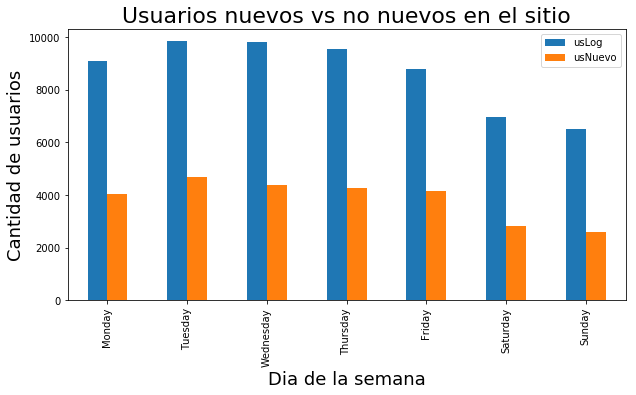

In [26]:
g = df_result.plot.bar(figsize=(10,5))
#df.plot(x="X", y=["A", "B", "C"], kind="bar")
g.set_title("Usuarios nuevos vs no nuevos en el sitio", fontsize=22)
g.set_xlabel("Dia de la semana",fontsize=18)
g.set_ylabel("Cantidad de usuarios", fontsize=18)

In [27]:
# Ver segun las horas la misma comparacion..  cuando suceden los evenos de los nuevos y los no nuevos
# Ver segun las horas en los dias .. cuando se producen mas eventos.. en especial los de ventas..

In [28]:
df_aux = (df_eventos.loc[df_eventos['new_vs_returning'] == "Returning"])

In [29]:
df_aux = df_aux[['fecha_evento_dia_name','hora','event']]

In [30]:
df_aux = (df_aux.groupby(['fecha_evento_dia_name','hora']).size().reset_index(name='usLog'))
df_aux.head(10)

,fecha_evento_dia_name,hora,usLog
0,Friday,0,579
1,Friday,1,498
2,Friday,2,396
3,Friday,3,249
4,Friday,4,169
5,Friday,5,68
6,Friday,6,48
7,Friday,7,53
8,Friday,8,51
9,Friday,9,106


In [31]:
lista_lunes = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Monday'])['hora'].values.astype(float)
lista_martes = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Tuesday'])['hora'].values.astype(float)
lista_miercoles = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Wednesday'])['hora'].values.astype(float)
lista_jueves = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Thursday'])['hora'].values.astype(float)
lista_viernes = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Friday'])['hora'].values.astype(float)
lista_sabado = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Saturday'])['hora'].values.astype(float)
lista_domingo = (df_eventos_usLog.loc[df_eventos_usLog['fecha_evento_dia_name']=='Sunday'])['hora'].values.astype(float)
lista_completa = [lista_lunes,lista_martes,lista_miercoles,lista_jueves,lista_viernes,lista_sabado,lista_domingo]

[Text(0,0,'--'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

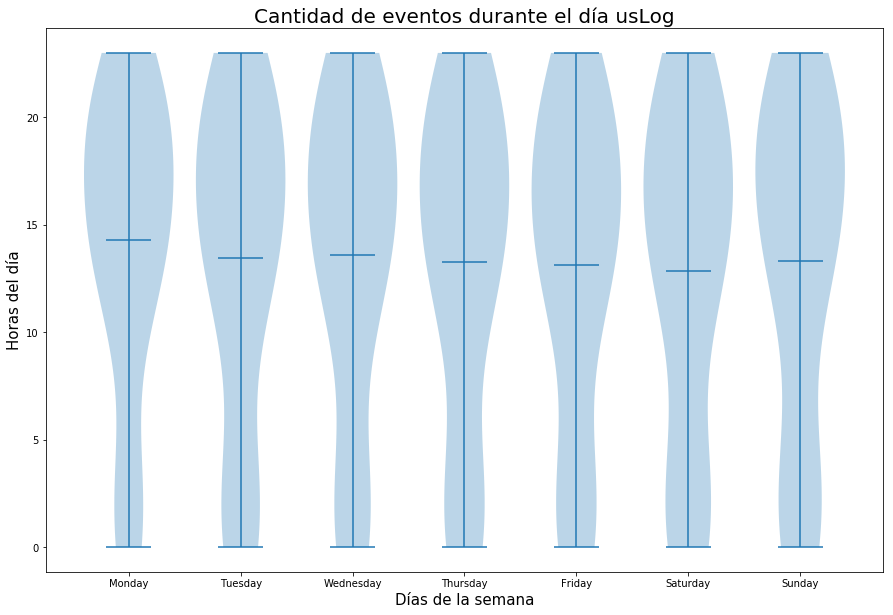

In [32]:

pos = [0, 1, 2, 3, 4,5,6]
x_ticks_labels = ['--','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = lista_completa

fig, axes = plt.subplots(figsize=(15, 10))

axes.violinplot(lista_completa, pos,widths=0.8,showmeans=True,
                      showextrema=True,points=200, bw_method=0.5)
axes.set_title('Cantidad de eventos durante el día usLog', fontsize=20)
axes.set_ylabel('Horas del día',fontsize=15)
axes.set_xlabel('Días de la semana',fontsize=15)

axes.set_xticklabels(x_ticks_labels, rotation='horizontal')

In [33]:
lista_lunes = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Monday'])['hora'].values.astype(float)
lista_martes = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Tuesday'])['hora'].values.astype(float)
lista_miercoles = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Wednesday'])['hora'].values.astype(float)
lista_jueves = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Thursday'])['hora'].values.astype(float)
lista_viernes = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Friday'])['hora'].values.astype(float)
lista_sabado = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Saturday'])['hora'].values.astype(float)
lista_domingo = (df_eventos_usNuevos.loc[df_eventos_usNuevos['fecha_evento_dia_name']=='Sunday'])['hora'].values.astype(float)
lista_completa = [lista_lunes,lista_martes,lista_miercoles,lista_jueves,lista_viernes,lista_sabado,lista_domingo]

[Text(0,0,'--'),
 Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

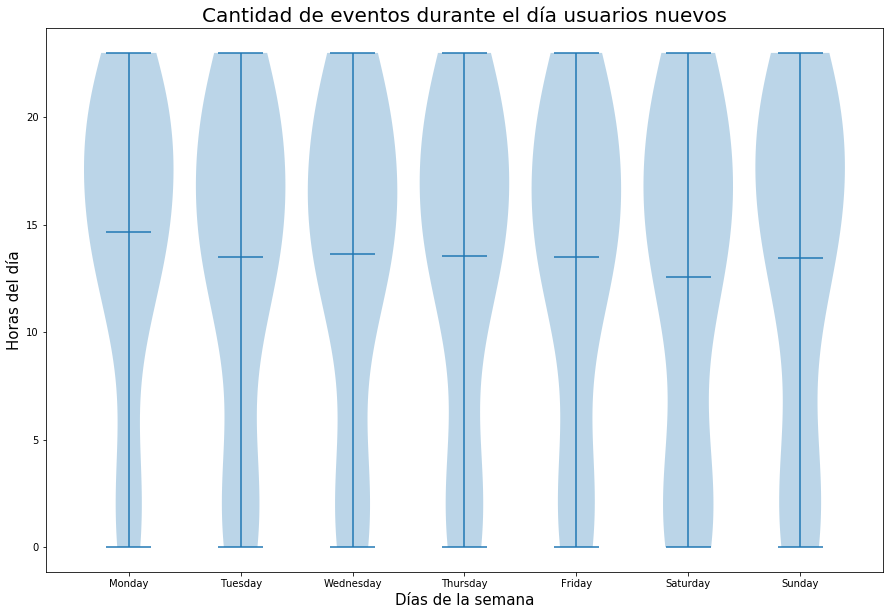

In [34]:
pos = [0, 1, 2, 3, 4,5,6]
x_ticks_labels = ['--','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = lista_completa

fig, axes = plt.subplots(figsize=(15, 10))

axes.violinplot(lista_completa, pos,widths=0.8,showmeans=True,
                      showextrema=True,points=200, bw_method=0.5)
axes.set_title('Cantidad de eventos durante el día usuarios nuevos', fontsize=20)
axes.set_ylabel('Horas del día',fontsize=15)
axes.set_xlabel('Días de la semana',fontsize=15)

axes.set_xticklabels(x_ticks_labels, rotation='horizontal')

In [35]:
# Analizar las distancias entre categorias .. sobre todo la que termina comprando

In [36]:
#colocar los dias como indices... colocar en columnas las horas ... y llenar con la cantidad

In [37]:
df_aux = (df_eventos.loc[df_eventos['new_vs_returning'] == "Returning"])

In [38]:
df_aux = df_aux[['fecha_evento_dia_name','hora','event']]

In [39]:
df_aux = df_aux.groupby(['fecha_evento_dia_name','hora']).agg('count')
df_aux.head(5)

event
fecha_evento_dia_name hora       
Friday                0       579
                      1       498
                      2       396
                      3       249
                      4       169

In [40]:
df_auxB = df_aux.copy()

In [41]:
df_asd = df_auxB.unstack(fill_value=0)
df_asd.columns = df_asd.columns.droplevel(0)
#df_asd.reindex(index=df_asd.index[::-1])
df_asd = df_asd[df_asd.columns[::-1]]

Text(105,0.5,'Categoría')

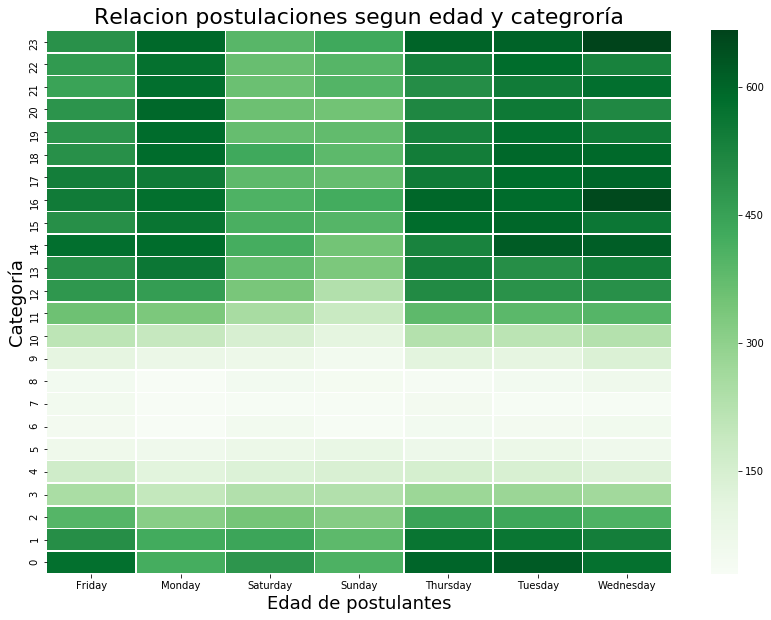

In [42]:
fig, ax = plt.subplots(figsize=(14,10))
g = sns.heatmap(df_asd.T,ax=ax,linewidths=.5,cmap='Greens')
g.set_title("Relacion postulaciones segun edad y categroría", fontsize=22)
g.set_xlabel("Edad de postulantes",fontsize=18)
g.set_ylabel("Categoría", fontsize=18)

In [43]:
#ver si hay mas de un evento por usuarui en el mismo horario

In [44]:
df_eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'fecha_evento',
       'fecha_evento_dia_name', 'fecha_evento_dia_nameNum', 'hora'],
      dtype='object')

In [45]:
df_eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,region,country,device_type,screen_resolution,operating_system_version,browser_version,fecha_evento,fecha_evento_dia_name,fecha_evento_dia_nameNum,hora
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:05,Thursday,3,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,Thursday,3,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:09,Thursday,3,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:40,Thursday,3,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29 13:29:25,Tuesday,1,13


In [46]:
df_acotado = df_eventos[['person','event','fecha_evento']]

In [47]:
df_acotado.head()

,person,event,fecha_evento
0,0004b0a2,ad campaign hit,2018-05-31 23:38:05
1,0004b0a2,visited site,2018-05-31 23:38:05
2,0004b0a2,viewed product,2018-05-31 23:38:09
3,0004b0a2,checkout,2018-05-31 23:38:40
4,0006a21a,viewed product,2018-05-29 13:29:25


In [48]:
df_acotado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 3 columns):
person          1011288 non-null object
event           1011288 non-null object
fecha_evento    1011288 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.1+ MB


In [49]:
#df_acotado.drop_duplicates(subset=['fecha_evento','person']).info()
g = df_acotado.groupby(['fecha_evento','person']).size().reset_index(name='f_repeticion')

In [50]:
g.head()

,fecha_evento,person,f_repeticion
0,2018-01-01 07:32:26,9250d410,4
1,2018-01-01 09:51:51,8b6dbd1d,1
2,2018-01-01 09:51:53,8b6dbd1d,1
3,2018-01-01 12:40:21,8b6dbd1d,2
4,2018-01-01 12:41:07,8b6dbd1d,1


In [51]:
#vemos que hay mas de un evento en el mismo momento por una persona, lo cual no deberia poder suceder eso...

In [52]:
g = g[g['f_repeticion']<=1]

In [53]:
g.head()

,fecha_evento,person,f_repeticion
1,2018-01-01 09:51:51,8b6dbd1d,1
2,2018-01-01 09:51:53,8b6dbd1d,1
4,2018-01-01 12:41:07,8b6dbd1d,1
5,2018-01-01 12:41:34,8b6dbd1d,1
6,2018-01-01 12:41:59,8b6dbd1d,1


In [54]:
#ahora hacer un merge con el df_acotado, donde uno hacia la izquierda donde el df de izq es g.

In [55]:
a = pd.merge(g,df_acotado,how='left',on=['person','fecha_evento'])
#aca cuando hago el merge.. creo que capaz puedo tener distintos eventos, cuando fue repetido en el mismo momento, capaz el evento es distinto.......

In [56]:
d = df_acotado[df_acotado['person']=='9250d410']
d = d[d['fecha_evento']=='2018-01-01 07:32:26']

In [57]:
d.head()

,person,event,fecha_evento
571672,9250d410,search engine hit,2018-01-01 07:32:26
571673,9250d410,ad campaign hit,2018-01-01 07:32:26
571674,9250d410,visited site,2018-01-01 07:32:26
571675,9250d410,generic listing,2018-01-01 07:32:26


In [58]:
#entonces con cuales me quedo? 

In [59]:
a = a[a['person']=='9250d410']
a = a[a['fecha_evento']=='2018-01-01 07:32:26']

In [60]:
a.head()

,fecha_evento,person,f_repeticion,event


In [61]:
#no puedo hacer drop_duplicates porque pierdo entonces la referencia a esa persona en ese horario.. pierdo datos....

In [62]:
g = df_acotado.groupby(['fecha_evento','person','event']).size().reset_index(name='f_repeticion')

In [63]:
g.sort_values(by='f_repeticion',ascending=False).head()

,fecha_evento,person,event,f_repeticion
693151,2018-05-30 16:50:15,3b5f5f71,viewed product,9
136898,2018-04-04 20:33:41,1830360d,viewed product,8
995650,2018-06-15 14:05:11,d2152e1b,viewed product,8
445953,2018-05-17 13:15:08,7519a032,viewed product,7
193351,2018-04-18 23:35:00,badaab79,viewed product,7


In [64]:
#estos son los que tendria que borrar ... porque son el mismo evento en el mismo momento... deberia ser un mismo evento en un mismo momento..

In [65]:
# --> g = g[g['f_repeticion']<=1] # aca perdi todo lo de los duplicados.. osea los 9 de 9 que habian... 
# capaz puedo hacer una copia primero con todos los mayores a 1 .. y entonces ahi luego agrego esas columnas al final del otro df .. dejando a todos con una unica coincidencia

In [66]:
no_repetidos = (g[g['f_repeticion']>1])[['fecha_evento','person','event']]

In [67]:
no_repetidos.head()

,fecha_evento,person,event
213,2018-01-02 15:57:28,cbaee231,viewed product
226,2018-01-02 18:22:05,4ebea86f,viewed product
948,2018-01-04 11:36:03,1daa389b,viewed product
1093,2018-01-04 15:55:18,4bd64f72,viewed product
1096,2018-01-04 15:56:12,4bd64f72,viewed product


In [68]:
g = g[['fecha_evento','person','event']]
g = g.append(no_repetidos)

In [69]:
g.head()

,fecha_evento,person,event
0,2018-01-01 07:32:26,9250d410,ad campaign hit
1,2018-01-01 07:32:26,9250d410,generic listing
2,2018-01-01 07:32:26,9250d410,search engine hit
3,2018-01-01 07:32:26,9250d410,visited site
4,2018-01-01 09:51:51,8b6dbd1d,visited site


In [70]:
df_eventos_no_rep = g.copy()

In [71]:
df_eventos_no_rep['dia'] = df_eventos_no_rep['fecha_evento'].dt.weekday_name
df_eventos_no_rep['dia_num'] = df_eventos_no_rep['fecha_evento'].dt.weekday
df_eventos_no_rep['hora'] = df_eventos_no_rep['fecha_evento'].dt.hour

In [72]:
df_eventos_no_rep.sort_values(by='dia_num',ascending=True,inplace=True)

In [73]:
#contar ahora entonces cantidad de eventos en el dia segun la hora, haciendo primero un filtro de si la persona es newvo o no ...

In [74]:
df_aux = df_eventos_no_rep.groupby(['dia','hora']).size().reset_index(name='cantidad')

In [75]:
df_aux.head()

,dia,hora,cantidad
0,Friday,0,10356
1,Friday,1,8479
2,Friday,2,7484
3,Friday,3,5387
4,Friday,4,2981


In [76]:
asd = df_eventos_no_rep.groupby(['dia','hora']).agg('count')
asd.head(5)

fecha_evento  person  event  dia_num
dia    hora                                      
Friday 0            10356   10356  10356    10356
       1             8479    8479   8479     8479
       2             7484    7484   7484     7484
       3             5387    5387   5387     5387
       4             2981    2981   2981     2981

In [77]:
df_asd = df_auxB.unstack(fill_value=0)
df_asd.columns = df_asd.columns.droplevel(0)
#df_asd.reindex(index=df_asd.index[::-1])
df_asd = df_asd[df_asd.columns[::-1]]

Text(105,0.5,'Hora')

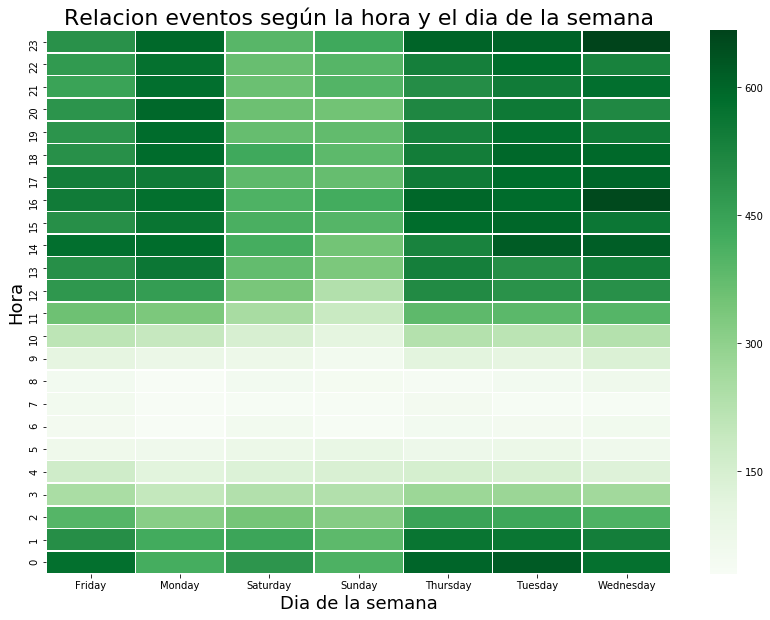

In [78]:

###############


fig, ax = plt.subplots(figsize=(14,10))
g = sns.heatmap(df_asd.T,ax=ax,linewidths=.5,cmap='Greens')
g.set_title("Relacion eventos según la hora y el dia de la semana", fontsize=22)
g.set_xlabel("Dia de la semana",fontsize=18)
g.set_ylabel("Hora", fontsize=18)

In [79]:
df_eventos.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'fecha_evento',
       'fecha_evento_dia_name', 'fecha_evento_dia_nameNum', 'hora'],
      dtype='object')

In [80]:
df_eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,region,country,device_type,screen_resolution,operating_system_version,browser_version,fecha_evento,fecha_evento_dia_name,fecha_evento_dia_nameNum,hora
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:05,Thursday,3,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,Thursday,3,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:09,Thursday,3,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31 23:38:40,Thursday,3,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29 13:29:25,Tuesday,1,13


In [81]:
df_modVendido = df_eventos[['model','event']]

In [82]:
df_modVendido.head()

,model,event
0,NaN,ad campaign hit
1,NaN,visited site
2,iPhone 5s,viewed product
3,iPhone 5s,checkout
4,Samsung Galaxy S8,viewed product


In [83]:
df_as = df_modVendido.dropna()

In [84]:
df_as.head()

,model,event
2,iPhone 5s,viewed product
3,iPhone 5s,checkout
4,Samsung Galaxy S8,viewed product
7,Samsung Galaxy S8,checkout
13,Motorola Moto Z Play,viewed product


In [85]:
df_as['event'].value_counts()

viewed product    528931
checkout           33733
conversion          1172
lead                 448
Name: event, dtype: int64

In [86]:
df_as = df_as[df_as['event']=='conversion']

In [87]:
d = df_as.groupby('model').size().reset_index(name='cantidad')

In [88]:
d.sort_values(by='cantidad',ascending=False,inplace=True)

In [89]:
d.head()

,model,cantidad
55,Samsung Galaxy J5,88
102,iPhone 5s,84
103,iPhone 6,71
83,Samsung Galaxy S6 Flat,39
105,iPhone 6S,37


Text(0,0.5,'Cantidad de compras')

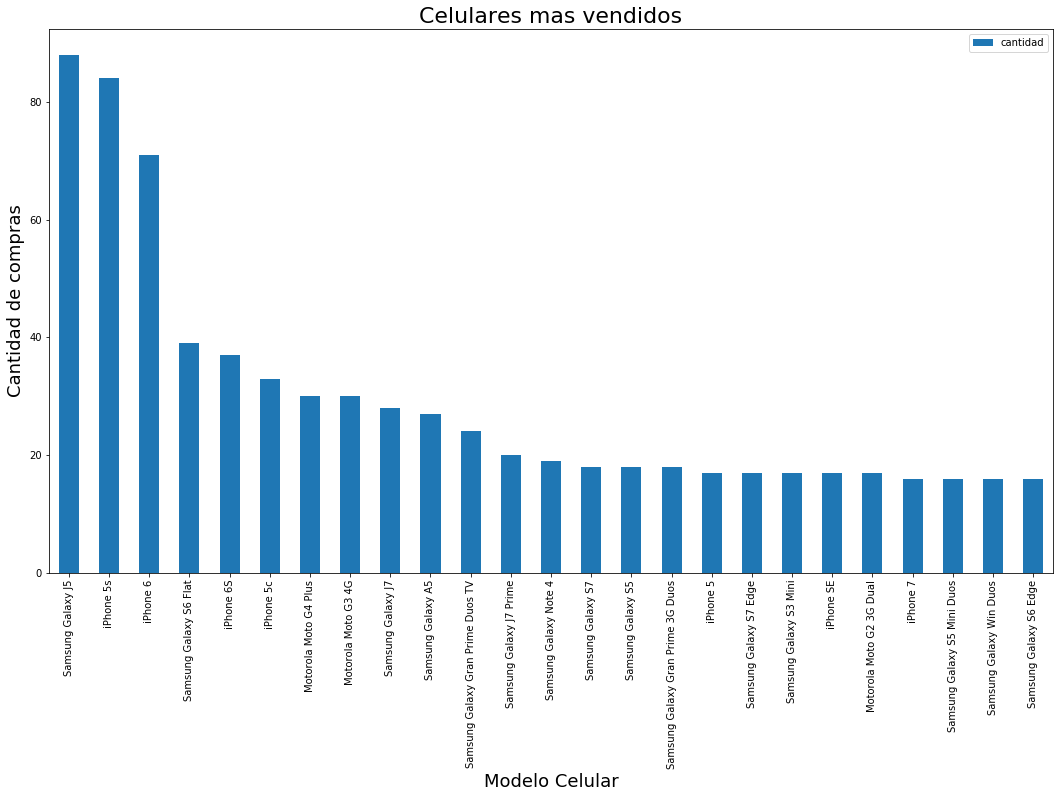

In [90]:
d2 = d[d['cantidad']>15]
d2 = d2.set_index('model')
g = d2.plot.bar(figsize=(18,10))
g.set_title("Celulares mas vendidos", fontsize=22)
g.set_xlabel("Modelo Celular",fontsize=18)
g.set_ylabel("Cantidad de compras", fontsize=18)

In [91]:
# buscar los mas vendidos en el ultimo timpo...

In [92]:
df_modVendido = df_eventos[['model','event','fecha_evento']]

In [93]:
df_dd = df_modVendido.dropna().copy()
df_dd.sort_values(by='fecha_evento',ascending=False,inplace=True)

In [94]:
df_dd = df_dd[df_dd['event']=='checkout']

In [95]:
l = df_dd.groupby('model').size().reset_index(name='cantidad')

In [96]:
l = pd.merge(l,df_dd,on='model',how='inner')

In [97]:
l.head()

,model,cantidad,event,fecha_evento
0,Asus Zenfone 2,4,checkout,2018-02-03 11:05:10
1,Asus Zenfone 2,4,checkout,2018-01-29 08:08:12
2,Asus Zenfone 2,4,checkout,2018-01-27 21:00:56
3,Asus Zenfone 2,4,checkout,2018-01-27 05:33:59
4,Asus Zenfone 2 Deluxe,2,checkout,2018-04-16 20:57:16


In [98]:
l.sort_values(by=['fecha_evento','cantidad'],ascending=False, inplace=True)

In [99]:
#analizar casos donde hay mas de un evento en el mismo tiempo.. y evaluar si son casos posibles o no y justificar poruque me quedaria con ellos o porque los descartaria...

In [100]:
#################################################################################################################

In [101]:
######### analizar cuantos de los que entran a carrito despues lo compran....

In [102]:
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 27 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [103]:
d2.head()

,cantidad
model,
Samsung Galaxy J5,88
iPhone 5s,84
iPhone 6,71
Samsung Galaxy S6 Flat,39
iPhone 6S,37


In [104]:
df_eventos['anio'] = df_eventos['fecha_evento'].dt.year

In [105]:
df_eventos['mes'] = df_eventos['fecha_evento'].dt.month

In [106]:
df_eventos['dia'] = df_eventos['fecha_evento'].dt.day

In [107]:
df_aux = df_eventos[['person','model','event','fecha_evento','sku']]

In [108]:
df_aux.head()

,person,model,event,fecha_evento,sku
0,0004b0a2,NaN,ad campaign hit,2018-05-31 23:38:05,NaN
1,0004b0a2,NaN,visited site,2018-05-31 23:38:05,NaN
2,0004b0a2,iPhone 5s,viewed product,2018-05-31 23:38:09,2694.0
3,0004b0a2,iPhone 5s,checkout,2018-05-31 23:38:40,2694.0
4,0006a21a,Samsung Galaxy S8,viewed product,2018-05-29 13:29:25,15338.0


In [109]:
df_as = df_aux.dropna()

In [110]:
df_as.head()

,person,model,event,fecha_evento,sku
2,0004b0a2,iPhone 5s,viewed product,2018-05-31 23:38:09,2694.0
3,0004b0a2,iPhone 5s,checkout,2018-05-31 23:38:40,2694.0
4,0006a21a,Samsung Galaxy S8,viewed product,2018-05-29 13:29:25,15338.0
7,0006a21a,Samsung Galaxy S8,checkout,2018-05-29 13:29:35,15338.0
13,000a54b2,Motorola Moto Z Play,viewed product,2018-04-09 20:13:14,12661.0


In [111]:
df_a = df_as.loc[df_as['event']=='conversion']

In [112]:
df_b = df_as.loc[df_as['event']=='checkout']

In [113]:
df_merge = pd.merge(df_a,df_b,how='inner',on=['person','sku'])

In [114]:
df_merge.head()

,person,model_x,event_x,fecha_evento_x,sku,model_y,event_y,fecha_evento_y
0,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:15:27
1,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:16:51
2,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:20:17
3,00fdbb4b,Samsung Galaxy S6 Flat,conversion,2018-06-10 14:37:50,3348.0,Samsung Galaxy S6 Flat,checkout,2018-06-11 01:47:34
4,0146a9df,iPhone 5s,conversion,2018-03-16 13:50:25,2694.0,iPhone 5s,checkout,2018-03-16 13:41:36


In [115]:
df_aux = df_merge.loc[df_merge['fecha_evento_x']>=df_merge['fecha_evento_y']]

In [116]:
df_aux.head()

,person,model_x,event_x,fecha_evento_x,sku,model_y,event_y,fecha_evento_y
0,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:15:27
1,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:16:51
2,00c13dee,Samsung Galaxy Core Plus Duos TV,conversion,2018-04-26 22:28:53,6650.0,Samsung Galaxy Core Plus Duos TV,checkout,2018-04-26 22:20:17
4,0146a9df,iPhone 5s,conversion,2018-03-16 13:50:25,2694.0,iPhone 5s,checkout,2018-03-16 13:41:36
5,01db2fe6,Samsung Galaxy J5,conversion,2018-02-09 22:07:07,6357.0,Samsung Galaxy J5,checkout,2018-02-09 21:54:43


In [117]:
d_aux = df_aux.groupby(['model_x']).size().reset_index(name='cantidad')

In [118]:
d_aux.head()

,model_x,cantidad
0,Asus Zenfone 5,1
1,LG G3 D855,4
2,LG G4 H815P,2
3,LG G4 H818P,1
4,LG K10,9


Text(0,0.5,'Cantidad de compras')

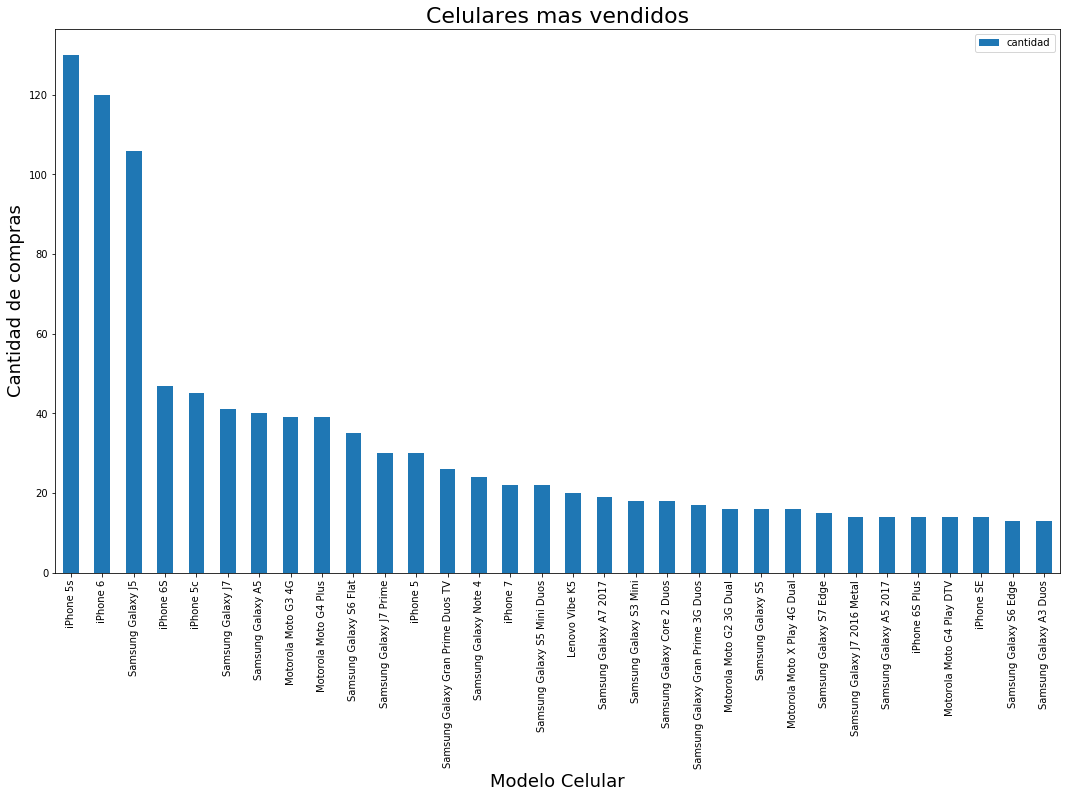

In [119]:
d2 = d_aux[d_aux['cantidad']>12]
d2 = d2.set_index('model_x')
g = d2.sort_values(by='cantidad',ascending=False).plot.bar(figsize=(18,10))
g.set_title("Celulares mas vendidos", fontsize=22)
g.set_xlabel("Modelo Celular",fontsize=18)
g.set_ylabel("Cantidad de compras", fontsize=18)

In [120]:
# puedo hacer un flag para saber si termino en compra.. de forma que comparo despues con los que terminaron comprando y los que no ...

In [121]:
#### fran #####

In [122]:
df_aux = df_eventos[['person','country','event']].copy()

In [123]:
df_aux.head()

,person,country,event
0,0004b0a2,NaN,ad campaign hit
1,0004b0a2,Brazil,visited site
2,0004b0a2,NaN,viewed product
3,0004b0a2,NaN,checkout
4,0006a21a,NaN,viewed product


In [124]:
df_aux2 = df_aux.copy()

In [125]:
df_aux2['vive_Brazil'] = df_aux2['country']=='Brazil'

In [126]:
df_aux2.head()

,person,country,event,vive_Brazil
0,0004b0a2,NaN,ad campaign hit,False
1,0004b0a2,Brazil,visited site,True
2,0004b0a2,NaN,viewed product,False
3,0004b0a2,NaN,checkout,False
4,0006a21a,NaN,viewed product,False


In [127]:
df_aux2 = df_aux2.loc[df_aux2['vive_Brazil']==True]

In [128]:
df_aux2= df_aux2[['person','vive_Brazil']]

In [129]:
df_fran = pd.merge(df_aux,df_aux2,how='inner',on='person')

In [130]:
df_fran.head()

,person,country,event,vive_Brazil
0,0004b0a2,NaN,ad campaign hit,True
1,0004b0a2,Brazil,visited site,True
2,0004b0a2,NaN,viewed product,True
3,0004b0a2,NaN,checkout,True
4,0006a21a,NaN,viewed product,True


In [131]:
#### fran ####

In [132]:
#### device_type ####

In [149]:
df_dispositivos = df_eventos[['device_type']].copy()

In [150]:
df_dispositivos['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [151]:
df_dispositivos['device_type'].isnull().value_counts()

True     923910
False     87378
Name: device_type, dtype: int64

In [152]:
df_dispositivos['device_type'] = df_dispositivos['device_type'].dropna()

In [154]:
df_g = df_dispositivos.groupby('device_type').size().reset_index(name="cantidad")

In [158]:
df_g= df_g.set_index('device_type')
df_g.head()

,cantidad
device_type,
Computer,41790
Smartphone,44239
Tablet,1234
Unknown,115


Text(0,0.5,'Cantidad de eventos')

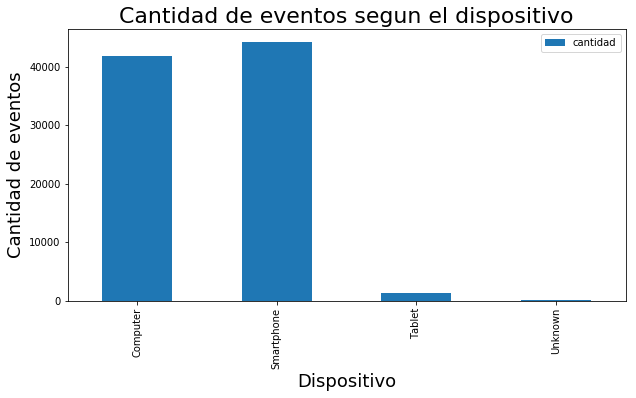

In [160]:
g = df_g.plot.bar(figsize=(10,5))
#df.plot(x="X", y=["A", "B", "C"], kind="bar")
g.set_title(" Cantidad de eventos segun el dispositivo ", fontsize=22)
g.set_xlabel("Dispositivo",fontsize=18)
g.set_ylabel("Cantidad de eventos", fontsize=18)

In [4]:
df_c = df_eventos[['device_type','event']].copy()

In [5]:
df_c = df_c[df_c['event']=='conversion']

In [6]:
df_c.head()

,device_type,event
220,NaN,conversion
2282,NaN,conversion
2547,NaN,conversion
4245,NaN,conversion
6985,NaN,conversion


In [7]:
df_c.dropna()

,device_type,event


In [8]:
## no puedo comparar compras en smartphone o computadora... quedan vacios los campos

In [9]:
###   search_term: ###
# buscar las palabras mas buscadas en su buscador

In [10]:
df_palabras = df_eventos[['search_term']].copy()

In [11]:
df_palabras = df_palabras.dropna()

In [12]:
df_g = df_palabras.groupby('search_term').size().reset_index(name='cantidad')

Text(0,0.5,'Cantidad de veces que la palabra se buscó')

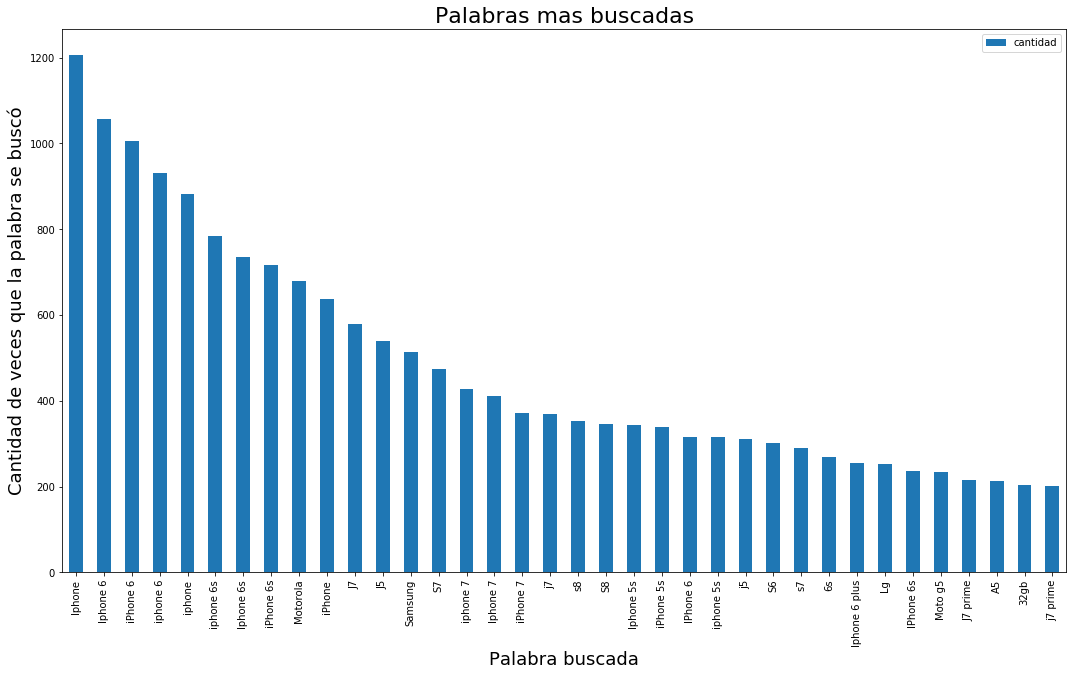

In [17]:
d2 = df_g[df_g['cantidad']>200]
d2 = d2.set_index('search_term')
g = d2.sort_values(by='cantidad',ascending=False).plot.bar(figsize=(18,10))
g.set_title("Palabras mas buscadas", fontsize=22)
g.set_xlabel("Palabra buscada",fontsize=18)
g.set_ylabel("Cantidad de veces que la palabra se buscó", fontsize=18)

In [ ]:
#df_g.sort_values(by='cantidad',ascending=False)